In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.model_selection import train_test_split

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-05-25 19:08:24--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2024-05-25 19:08:24 (4.45 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset['sex'].replace(['male', 'female'], [0, 1], inplace=True)
dataset['smoker'].replace(['yes', 'no'], [1, 0], inplace=True)
dataset['region'].replace(['southeast', 'southwest', 'northwest', 'northeast'], [0, 1, 2, 3], inplace=True)
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,0,31.0,3,0,2,10600.55
1334,18,1,31.9,0,0,3,2205.98
1335,18,1,36.9,0,0,0,1629.83
1336,21,1,25.8,0,0,1,2007.95
1337,61,1,29.1,0,1,2,29141.36


In [4]:
train, test = train_test_split(dataset, test_size=0.2)

In [5]:
train_labels = train['expenses']
train_dataset = train.drop(['expenses'],axis=1)
train_dataset.head()

,age,sex,bmi,children,smoker,region
594,41,0,40.3,0,0,0
520,50,1,27.4,0,0,3
1170,18,0,27.4,1,1,3
398,64,0,25.6,2,0,1
434,31,0,28.6,1,0,2


In [6]:
test_labels = test['expenses']
test_dataset = test.drop(['expenses'],axis=1)
test_dataset.head()

,age,sex,bmi,children,smoker,region
248,19,0,20.9,1,0,1
356,46,0,43.9,3,0,0
703,34,1,26.4,1,0,2
1273,35,0,27.6,1,0,0
902,26,0,27.3,3,0,3


In [7]:
from keras.models import Sequential
from keras.layers import Dropout

normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = Sequential([
    normalizer,
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=16, activation='relu'),
    Dense(units=1)
])

In [8]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1518 (5.93 KB)
Trainable params: 1505 (5.88 KB)
Non-trainable params: 13 (56.00 Byte)
______________________

In [9]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100
)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13084.3838 - mae: 13084.3838 - mse: 314719712.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13082.3525 - mae: 13082.3525 - mse: 314661888.0000
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13078.5771 - mae: 13078.5771 - mse: 314556512.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13071.6738 - mae: 13071.6738 - mse: 314360000.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13060.3164 - mae: 13060.3164 - mse: 314046080.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13042.5898 - mae: 13042.5898 - mse: 313558816.0000
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 13016.1074 - mae: 13016.1074 - mse: 312825536.0000
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12979.6582 - mae: 12979.6582 - mse: 311832960.0000
Epoch 9/

9/9 - 0s - loss: 3332.3000 - mae: 3332.3000 - mse: 36767664.0000 - 188ms/epoch - 21ms/step
Testing set Mean Abs Error: 3332.30 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


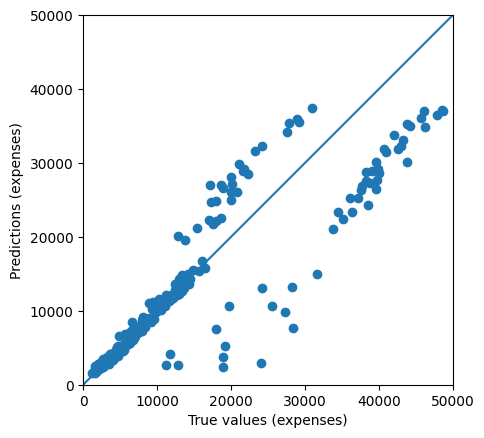

In [10]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
